<font size = 3> In medical decision making (classification, diagnosing, etc.) there are many situations where decision must be made effectively and reliably. <br>Conceptual simple decision making models with the possibility of automatic learning are the most appropriate for performing such tasks. <br> Decision trees are a reliable and effective decision making technique that provide high classification accuracy with a simple representation of gathered knowledge and they have been used in different areas of medical decision making.<br> A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks.</font>

## Outline:
<font size = 3> In this following script, a decision tree will be trained and validated using a lung cancer dataset, to perform classification tasks allowing for the  prediction of cancer given some symptoms and habits, <br> It is particulary interesting to use decision trees since they are particularly useful for knowledge discovery tasks like the one investigated here. </font>

In [1]:
# Accessing the Dataset, and importing the useful library pandas.
import pandas as pd
path = '../input/lung-cancer/survey lung cancer.csv'
dataset = pd.read_csv(path)

In [2]:
# Visualising the dataset
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Preparing the Dataset
<font size = 3> We want to first of all prepare the data, choosing both the input variables, which are going to be the patient's Age, whether the person is a smoker or has experienced a series of symptoms like Chest Pain, Shortness of Breath or chronic cough. And the target variable which we want our regression model (our machine learning model) to predict effectively, which in this case is whether the patient has lung cancer or not.
    </font>

In [3]:
inputs = ['AGE','SMOKING','COUGHING','SHORTNESS OF BREATH','CHEST PAIN']
X = dataset[inputs]
y = dataset.LUNG_CANCER

In [4]:
# Checking if the input variables have been accessed correctly
X.head()

,AGE,SMOKING,COUGHING,SHORTNESS OF BREATH,CHEST PAIN
0,69,1,2,2,2
1,74,2,1,2,2
2,59,1,2,2,2
3,63,2,1,1,2
4,63,1,2,2,1


In [5]:
# Checking if the y variables (What we are trying to predict, cancer yes or no)
y.head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

### Preparing the data for posterior test of our model accuracy
<font size = 3> If we trained our model with the entire dataset and then checked the model for a portion of our dataset, the model will do great predictions, however, our model may not do so well with the data it has never seen, this is what is known as overfitting. For this reason, it is a good practice to split the dataset to have both a training dataset, which we are going to fit our model with, and a validation dataset which can be used to check if our model is doing a good job inferring (predicting) data that it has never seen, this will basically allow us to check our model accuracy in a less biased way.<br>
    Another big problem that can also occur is the underfitting problem. This is caused when our model fails on catching the features of our dataset, not producing good predictions as a result. This problem is often related with having small datasets, which we will not have to worry here.

In [6]:
# Using train_test_split function of sklearn we can split the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

<font size = 3> As we could see when printing the dataset, the target variable LUNG_CANCER is a categorical data, basically, a non numerical value 'yes' or 'no', therefore we have to convert this into a numerical value in order to be used by our model.<br>
We first perform fit_transform on our training data since we want to scale the training data and also learn the scaling parameters of that data. On the other hand, we use transform on our test data since we do not want to compute a mean and variance for this feature (scaling parameters) we want to keep
this test data unknown until we test the model accuracy, hence, we do not want our model to get a good estimate of how it is performing on our test data, which will happen if we fitted the test data as well as transforming it. </font>

In [7]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.transform(y_test)

### Building our Decision Tree Classifier 
<font size = 3> Decision Trees work on a set of decisions derived from the data and its behavior. It does not use a linear classifier or regressor, so its performance is independent of the linear nature of the data. <br> A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions. <br> 
We will first initialise the model and then fit the data which will allow the model to identify the optimal split points within a tree, and hence, creating a node leaf structure. If this has not been clear enough, do not worry because the structure of our tree will be analysed throughly.</font>  

In [8]:
from sklearn.tree import DecisionTreeClassifier
# Setting the random_state to 1 allows us to everytime the code is generated the result will be the same, since the a complete random value is not going to be generated
# therefore our train and test datasets do not have different values each time, we run the code, in other words, when hardcoding the random_state to a certain value
# our test splits will always be deterministic
DecisionTreeClassifier_model = DecisionTreeClassifier(random_state = 42)
DecisionTreeClassifier_model.fit(X_train,y_train)
y_pred = DecisionTreeClassifier_model.predict(X_test)
from sklearn.metrics import accuracy_score, recall_score, f1_score
print('The accuracy score of this Decision Tree model is: {0:.1f}%'.format(100*accuracy_score(y_test, y_pred)))
print ('The recall score of this model is {0:.1f}%'.format(100*recall_score(y_test, y_pred)))
print ('The f1 score of this model is {0:.1f}%'.format(100*f1_score(y_test, y_pred)))

The accuracy score of this Decision Tree model is: 75.6%
The recall score of this model is 84.1%
The f1 score of this model is 85.9%


In [9]:
# Visualising the test ground truth
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [10]:
# Visualising the predictions done by our model
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

### Analysis of the results
<font size = 3> The accuracy of the Decision Tree Model measures the proportion of correct predictions of a validation dataset. <br> 
Recall measures the proportion of actual positive labels correctly identified by the model. We had significant good results for this, on our validation dataset, meaning that our model is able to do very good predictions for the positive lung cancer patients. However, the 75.6% accuracy suggests that we are diagnosing lung cancer to patients that in reality do not have it, for this reason, in a medical background we would want to assess the impact that missing lung cancer diagnosis or giving treatment to a healthy patient has. For this exact reason, we might want to get a second test which assesses the comformity of our test. <br>
In the F1 score, we compute the average of precision and recall. Our high f1 score means that both the accuracy and recall is high. 
</font>

## Visualisation of the created Tree Model

In [11]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 632.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.8 MB/s eta 0:00:00
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=50a9c7149e9c2b8a77ece13d6607e906d3b7ec71bd5024c38d5612499fc37c4f
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20 which is incompatible.


In [12]:
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


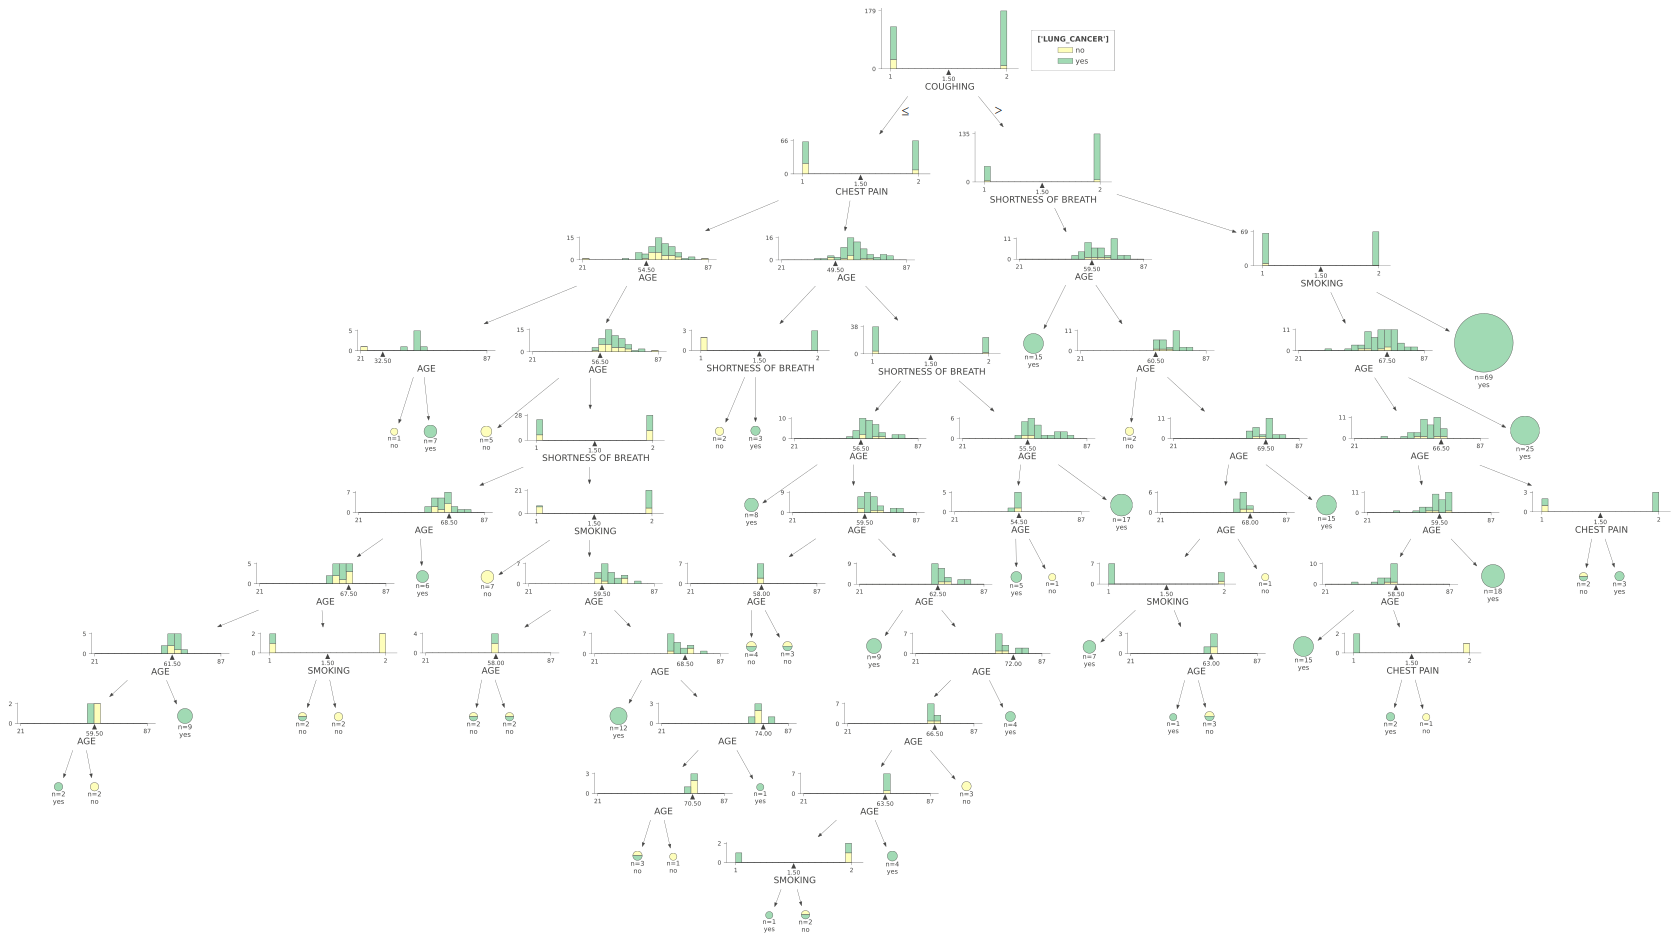

In [13]:
sk_dtree = ShadowSKDTree(DecisionTreeClassifier_model, X, LE.transform(y), inputs, ['LUNG_CANCER'], ["no", "yes"])
trees.dtreeviz(sk_dtree, show_node_labels=False)

<font size = 3> The image shown above, shows all the different decision trees created by our algorithm, they are used to classify our data in lung cancer (n = 1) or not lung cancer (n = 2), so as we give the ML algorithm data, depending on the optimal split points within a tree, the data will follow one tree or another, reaching on the end step a decision. </font>

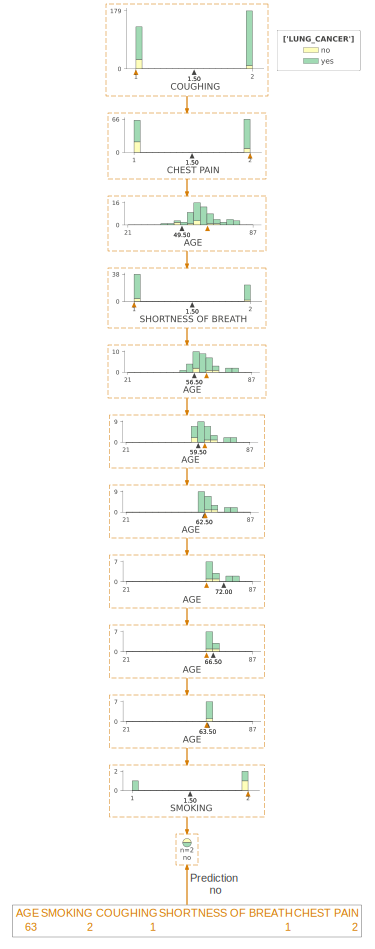

In [14]:
x = dataset[inputs].iloc[3]
# getting solely the prediction path
trees.dtreeviz(sk_dtree, X=x, show_just_path=True)

<font size = 3> The image been shown above is the tree path followed by a single input of a patient aged 63, smoker, which has chest pain. As we can see, depending on the optimal split points, shown with a black upwards pointing arrow, located under the x axis, the data continues towards a given leaf, and so on, until all the different features in the subtree have been assessed. As we can see, there is very little data in the end node, there are barely 3 samples that have similar characteristics, in other words, there has been siginificant data fragmentation, which can lead to overfitting, we will review further this issue in the next markdown. </font>

### Further improvements
<font size = 3> One big problem that decision trees have for a big number of input labels is that as a tree grows in size, it becomes increasingly difficult to maintain data points in a single class, and it usually results in too little data falling within a given subtree, as a result of subdividing the data points into more leafs. When this occurs, it is known as data fragmentation, and it can often lead to overfitting. Therefore, decision trees have a have preference for small trees. For a future implementation we might want to use a smaller tree structure. <br> 
Moreover, using a Random Forest Algorithm might be benefitial and an "easy win" for our prediction task. The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. In other words, it generates a random subset of features, which ensures low correlation among decision trees. Achieving very good results, specially for individual trees that are uncorrelated to each other. The main difference between this approach and the used in our project, is that the random forest only selects a subset of features, whereas the decision tree considers all of them, leading to the overfitting problem explained above. Random Forest Approach of feature randomness, can potentially reduce the risk of overfitting, bias, and overall variance, resulting in more precise predictions.</font> 

## References:
<font size = 3> Podgorelec, V. et al. (2002) ‘Decision Trees: An Overview and Their Use in Medicine’, Journal of Medical Systems, 26(5). <br>
What is a Decision Tree | IBM (no date). Available at: https://www.ibm.com/topics/decision-trees (Accessed: 15 June 2022). <br>
What is Random Forest? | IBM (no date). Available at: https://www.ibm.com/cloud/learn/random-forest (Accessed: 20 June 2022). <br>
MYSAR AHMAD BHAT (2021) Lung Cancer Dataset | Kaggle. Available at: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer (Accessed: 20 June 2022).
</font> 